In [5]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.preprocessing import LabelEncoder



from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [6]:
df = pd.read_csv('heart.csv', sep=',')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='age', ylabel='chol'>

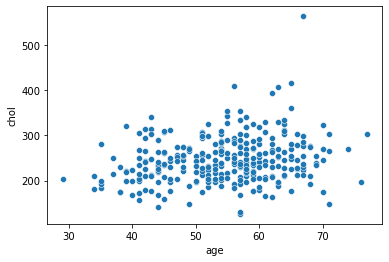

In [9]:
sns.scatterplot(x = df['age'] , y=df['chol'])

In [27]:
hi = df[['age','chol']].groupby(['age'],as_index= False).mean()
hi.head()

,age,chol
0,29,204.000000
1,34,196.000000
2,35,213.750000
3,37,232.500000
4,38,193.666667


<AxesSubplot:xlabel='age', ylabel='chol'>

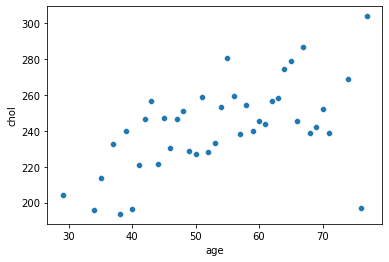

In [18]:
sns.scatterplot(x = hi['age'] , y=hi['chol'])

<AxesSubplot:xlabel='age', ylabel='chol'>

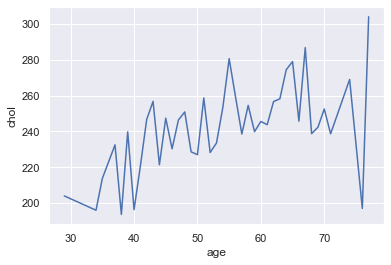

In [26]:
sns.set_theme(style="darkgrid")

# Load an example dataset with long-form data



sns.lineplot(x = hi['age'] , y=hi['chol'])


In [31]:
#features extraction
x = df[['age', 'chol','thalach']]
y = df['target']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)  #splitting data with test size of 25%

logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance

print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.74


<AxesSubplot:xlabel='Actual', ylabel='Predicted'>

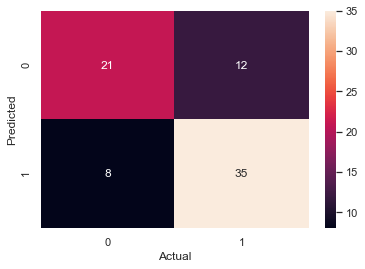

In [32]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Predicted'], colnames=['Actual'])
sns.heatmap(confusion_matrix, annot=True)

the area under this curve is :
0.7251585623678647


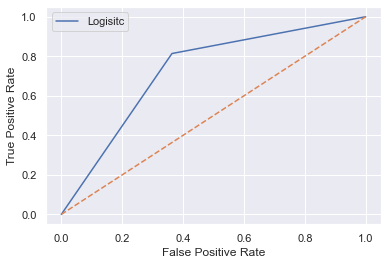

[1.  0.5 0. ]


In [33]:
hiauc = sklearn.metrics.roc_auc_score(y_test, y_pred)
print ("the area under this curve is :")
print (hiauc) # how to display only the first 2 or 3 digits ?

x = [0,1]
fpr,tpr, thresholds = sklearn.metrics.roc_curve(y_test, y_pred)

plt.plot(fpr, tpr, linestyle='-', label='Logisitc')
plt.plot(x, x, linestyle = '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()
plt.show()
print(thresholds/2) #why is the 'thresholds' value excesses '1' ??!
